<h1 style = color:#ff5a60 > <span style='font-family:Georgia' > <center>Airbnb Case Study</center></span></h1>
<img src = "https://th.bing.com/th/id/OIP.etHFJHbyZKhHrz7t9f7d9QHaEK?pid=ImgDet&rs=1">


<h3 style = color:#ff5a60 > <span style='font-family:Georgia' >
Problem Statement:</span></h3> 

- For the past few months, Airbnb has seen a major decline in revenue. 

- Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change. 

- The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue.

<h4 style = color:#674846 > <span style='font-family:Georgia' >
Let's understand the data first and create a final data for analysis.</span></h4> 


# Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
# Ignore warnings for any obselete feature or deprciated featured used any.
import warnings
warnings.filterwarnings("ignore")

In [210]:
## Changing Jupyter view options
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = 1000
pd.options.display.max_columns= 122
pd.set_option('float_format', '{:.2f}'.format)

# Load data

In [780]:
data = pd.read_csv("Downloads/AB_NYC_2019 (1).csv")

In [781]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Data Understanding

In [782]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [783]:
# Converting id and host_id to object

data['id'] = data.id.astype(str)
data['host_id'] = data.host_id.astype(str)

In [784]:
data[["neighbourhood_group","neighbourhood","room_type","last_review"]].describe()

,neighbourhood_group,neighbourhood,room_type,last_review
count,48895,48895,48895,38843
unique,5,221,3,1764
top,Manhattan,Williamsburg,Entire home/apt,23-06-2019
freq,21661,3920,25409,1413


# Data Preparation

- Treating Null Values if any.
- Treating Outliers if any.
- Creating bins for further analysis.

### 1. Treating Null Values if any.          

In [785]:
pd.DataFrame(data.isna().sum()[data.isna().sum()>0], columns = [ "Null Count"], )

,Null Count
name,16
host_name,21
last_review,10052
reviews_per_month,10052


<h3 style = color:#ff5a60 > 
    <span style='font-family:Georgia' > 
		There seems to have null values in following columns:
    </span>
</h3>

- name 
- host_name                       
- last_review                     
- reviews_per_month 


In [786]:
# For name and host_name, lets fill the null values with "Unknown".

data["name"].fillna(value = "Name not Known", inplace = True)
data["host_name"].fillna(value = "Name not Known", inplace = True)

In [787]:
# For last_review, lets fill the null values with DUMMY DATE.

In [788]:
data["last_review"].fillna(value = np.datetime64("1990-01-01"), inplace = True)

In [789]:
# For reviews_per_month, lets fill the null values with mean reviews, AS last reviews are not provided to us, 
# Hence better keep it to mean rating.

In [790]:
data[[ "neighbourhood"]][data["reviews_per_month"].isna()].nunique()

neighbourhood    193
dtype: int64

In [791]:
# So reviews per month for whom belongs to 193 different 

In [792]:
#Filling missing values as per mean values to its neighbourhood it belongs

neighborhood_mean_reviews = data.groupby(by= "neighbourhood")["reviews_per_month"].transform('mean').fillna(np.nanmean(data["reviews_per_month"]))
neighborhood_mean_reviews

0       1.04
1       1.28
2       1.34
3       0.97
4       1.67
        ... 
48890   1.55
48891   1.35
48892   1.34
48893   1.84
48894   1.84
Name: reviews_per_month, Length: 48895, dtype: float64

In [793]:
# fill the missing values in the 'reviews' column with the mean reviews for their respective neighborhoods
data['reviews_per_month'] = data['reviews_per_month'].fillna(neighborhood_mean_reviews)

<h3 style = color:#ff5a60 >No more null values</span></h3> 

In [794]:
pd.DataFrame(data.isna().sum()[data.isna().sum()>0], columns = [ "Null Count"], )

,Null Count


<h3 style = color:#ff5a60 >Unique values for each column</span></h3> 

In [795]:
lst = []
for col in data.columns:
    lst.append({"Col_name": col, "unique_values":data[col].nunique()})

df = pd.DataFrame(lst, columns=["Col_name","unique_values"])
df

,Col_name,unique_values
0,id,48895
1,name,47897
2,host_id,37457
3,host_name,11453
4,neighbourhood_group,5
5,neighbourhood,221
6,latitude,19048
7,longitude,14718
8,room_type,3
9,price,674


<h3 style = color:green>Insights:</h3> 

- A single host may host multiple properties.
- Only 674 repeated prices are there for around 49000 properties and same as the case with minimum nights. 
- Same as with last year. 

In [796]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


### 2. Treating Outliers if any.

In [797]:
num_cols = ["price", "minimum_nights","number_of_reviews","reviews_per_month"]
data[num_cols].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,48895.00,48895.00,48895.00,48895.00
mean,152.72,7.03,23.27,1.37
std,240.15,20.51,44.55,1.51
min,0.00,1.00,0.00,0.01
25%,69.00,1.00,1.00,0.28
50%,106.00,3.00,5.00,1.01
75%,175.00,5.00,24.00,1.80
max,10000.00,1250.00,629.00,58.50


<h2 style = color:#ff5a60 >There seems to have outliers in numerical data. Let's explore them.</h2> 

In [804]:
def box_plot_multiple(df, column_lst, n_rows = 1, n_cols = 1, title_size =0, fig_size = (15,8)):

    plt.figure(figsize = fig_size)
    
    for i,j in enumerate(column_lst):
        
        plt.subplot(n_rows, n_cols,  i+1)
        sns.boxplot(x=df[j])
        plt.title(j, fontsize = title_size, weight = 'bold')    
    
    plt.show()

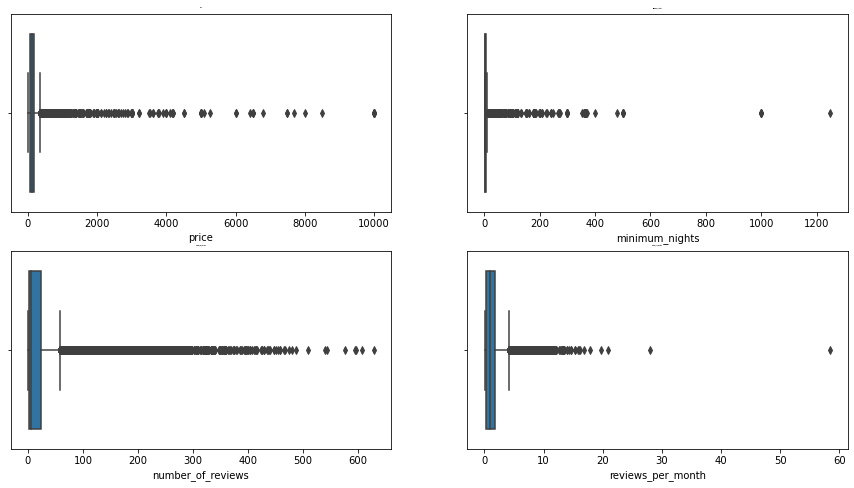

In [805]:
box_plot_multiple(df = data, column_lst = num_cols,
    n_rows=2,
    n_cols=2, )

<h2 style = color:#ff5a60 >Price</h2> 

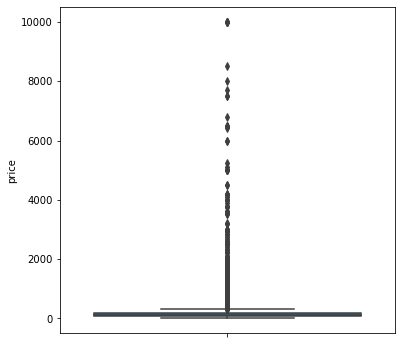

In [807]:
plt.figure(figsize = (6,6))
sns.boxplot(y=data["price"])   
plt.show()

In [808]:
def check_outliers(data, thresh= 3):
    threshold = thresh
    outlier = []
    avg = np.mean(data)
    std = np.std(data)
    for i in data:
        z = (i-avg)/std
        if z > threshold:
            outlier.append(i)

    return outlier

In [809]:
# Outlier Price for Entire Home/Apartments

outliers_price_entire_home = check_outliers(data["price"][data["room_type"]=="Entire home/apt"], thresh= 3)
print(min(outliers_price_entire_home))
print(np.mean(outliers_price_entire_home))
print(max(outliers_price_entire_home))

1066
2521.059139784946
10000


In [810]:
# Outlier Price for Private Room

outliers_price_private_room = check_outliers(data["price"][data["room_type"]=="Private room"], thresh= 3)
print(min(outliers_price_private_room))
print(np.mean(outliers_price_private_room))
print(max(outliers_price_private_room))

577
1375.1851851851852
10000


In [811]:
# Outlier Price for Shared Room

outliers_price_shared_room = check_outliers(data["price"][data["room_type"]=="Shared room"], thresh= 3)
print(min(outliers_price_shared_room))
print(np.mean(outliers_price_shared_room))
print(max(outliers_price_shared_room))

400
713.2352941176471
1800


#### Capping

In [812]:
# Capped the outliers value with the mean of outliers values based on room type

data["price"][((data["room_type"]=="Entire home/apt") & (data["price"] > np.mean(outliers_price_entire_home)))] = np.mean(outliers_price_entire_home)
data["price"][((data["room_type"]=="Private room") & (data["price"] > np.mean(outliers_price_private_room)))] = np.mean(outliers_price_private_room)
data["price"][((data["room_type"]=="Shared room") & (data["price"] > np.mean(outliers_price_shared_room)))] = np.mean(outliers_price_shared_room)

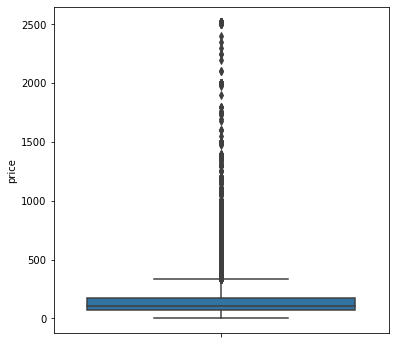

In [813]:
plt.figure(figsize = (6,6))
sns.boxplot(y=data["price"])   
plt.show()

# Minimum Nights

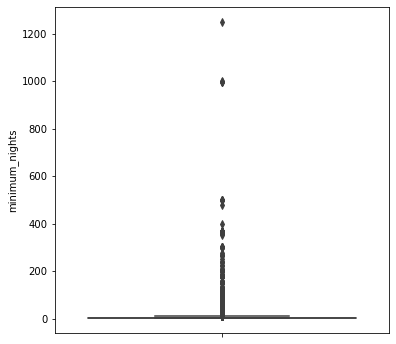

In [814]:
plt.figure(figsize = (6,6))
sns.boxplot(y=data["minimum_nights"])   
plt.show()

In [815]:
# Outlier Price for Entire Home/Apartments

outliers_minimum_nights_entire_home = check_outliers(data["minimum_nights"][data["room_type"]=="Entire home/apt"], thresh= 3)
print(min(outliers_minimum_nights_entire_home))
print(np.mean(outliers_minimum_nights_entire_home))
print(max(outliers_minimum_nights_entire_home))

80
179.26794258373207
1250


In [816]:
# Outlier Price for Private room

outliers_minimum_nights_private_room = check_outliers(data["minimum_nights"][(data["room_type"]=="Private room")], thresh= 3)
print(min(outliers_minimum_nights_private_room))
print(np.mean(outliers_minimum_nights_private_room))
print(max(outliers_minimum_nights_private_room))

55
137.3783783783784
999


In [817]:
# Outlier Price for Shared room

outliers_minimum_nights_shared_room = check_outliers(data["minimum_nights"][(data["room_type"]=="Shared room")], thresh= 2)
print(min(outliers_minimum_nights_shared_room))
print(np.mean(outliers_minimum_nights_shared_room))
print(max(outliers_minimum_nights_shared_room))

90
201.0
999


## Capping minimum_nights

In [818]:
data["minimum_nights"][((data["room_type"]=="Entire home/apt") & (data["minimum_nights"] > np.mean(outliers_minimum_nights_entire_home)))] = np.mean(outliers_minimum_nights_entire_home)
data["minimum_nights"][((data["room_type"]=="Shared room") & (data["minimum_nights"] > np.mean(outliers_minimum_nights_shared_room)))] = np.mean(outliers_minimum_nights_shared_room)
data["minimum_nights"][((data["room_type"]=="Private room") & (data["minimum_nights"] > np.mean(outliers_minimum_nights_private_room)))] = np.mean(outliers_minimum_nights_private_room)

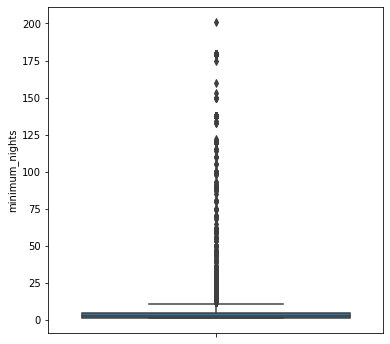

In [819]:
plt.figure(figsize = (6,6))
sns.boxplot(y=data["minimum_nights"])   
plt.show()

# number_of_reviews

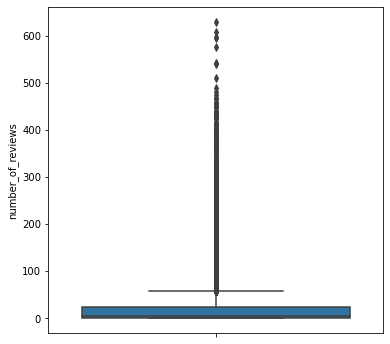

In [820]:
plt.figure(figsize = (6,6))
sns.boxplot(y=data["number_of_reviews"])   
plt.show()

In [821]:
# Outlier Price for Entire Home/Apartments

outliers_number_of_reviews = check_outliers(data["number_of_reviews"], thresh= 3)
print(min(outliers_number_of_reviews))
print(np.mean(outliers_number_of_reviews))
print(max(outliers_number_of_reviews))

157
221.91400491400492
629


# Capping values for number_of_reviews

In [822]:
data["number_of_reviews"][data["number_of_reviews"] > np.mean(outliers_number_of_reviews)] = np.mean(outliers_number_of_reviews)

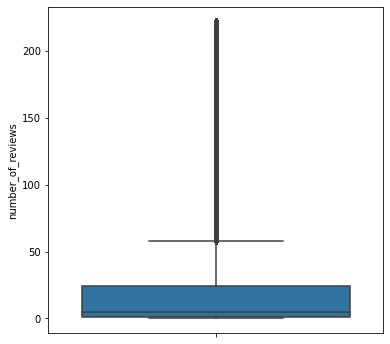

In [823]:
plt.figure(figsize = (6,6))
sns.boxplot(y=data["number_of_reviews"])   
plt.show()

# reviews_per_month

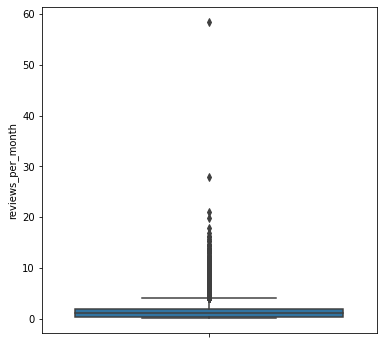

In [824]:
plt.figure(figsize = (6,6))
sns.boxplot(y=data["reviews_per_month"])   
plt.show()

In [825]:
# Outlier Price for Private Room

outliers_reviews_per_month = check_outliers(data["reviews_per_month"], thresh= 4)
print(min(outliers_reviews_per_month))
print(np.mean(outliers_reviews_per_month))
print(max(outliers_reviews_per_month))

7.41
9.488063583815029
58.5


In [826]:
data["reviews_per_month"][data["reviews_per_month"] >np.mean(outliers_reviews_per_month)] = np.mean(outliers_reviews_per_month)

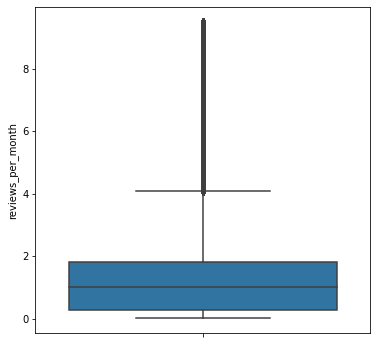

In [827]:
plt.figure(figsize = (6,6))
sns.boxplot(y=data["reviews_per_month"])   
plt.show()

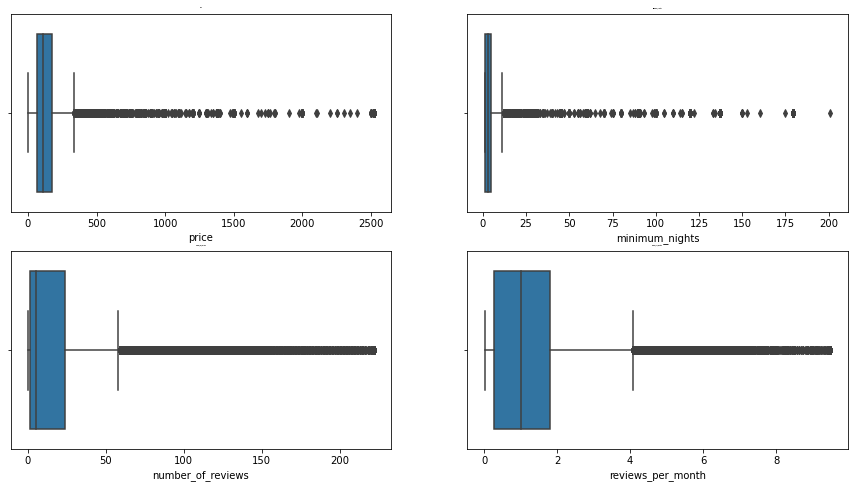

In [828]:
box_plot_multiple(df = data, column_lst = num_cols,
    n_rows=2,
    n_cols=2, )

In [676]:
data[num_cols].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,48895.00,48895.00,48895.00,48895.00
mean,149.09,6.68,22.68,1.36
std,165.71,13.44,40.77,1.45
min,0.00,1.00,0.00,0.01
25%,69.00,1.00,1.00,0.28
50%,106.00,3.00,5.00,1.01
75%,175.00,5.00,24.00,1.80
max,2521.06,201.00,221.91,9.49


### 3. Feature Engineering: Create Some new columns

- Month of Review
- Year of Review
- Number of Properties Host
- Binning of Price
- Binning of minimum nights
- Binning of number of reviews
- Binnging of reviews_per_month
- Binning of Availability 365
- Age of the property
- Property Age Bins
- Revenue

### Month and Year of the Last Review

In [677]:
data['last_review_year'] = pd.DatetimeIndex(data['last_review']).year
data['last_review_month'] = pd.DatetimeIndex(data['last_review']).month

In [678]:
data['last_review_year'] = data['last_review_year'].astype(str)

In [679]:
data['last_review_year'][data['last_review_year']=="1990"] = "Not Given"

In [680]:
data['last_review_year'].value_counts()

2019         25209
Not Given    10052
2018          6050
2017          3205
2016          2707
2015          1393
2014           199
2013            48
2012            25
2011             7
Name: last_review_year, dtype: int64

In [681]:
data['last_review_month'] = data['last_review_month'].astype(str)

In [682]:
data['last_review_month'][(data['last_review_year']=="Not Given") & (data['last_review_month']=='1')] = "Not Given"

In [683]:
data['last_review_month'].value_counts()

6            11785
Not Given    10052
5             4875
1             3548
4             2618
2             2509
3             2300
7             2279
8             2028
12            1953
9             1828
10            1742
11            1378
Name: last_review_month, dtype: int64

In [684]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149.00,1.00,9.00,19-10-2018,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225.00,1.00,45.00,21-05-2019,0.38,2,355,2019,5
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150.00,3.00,0.00,1990-01-01,1.34,1,365,Not Given,Not Given
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89.00,1.00,221.91,05-07-2019,4.64,1,194,2019,5
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80.00,10.00,9.00,19-11-2018,0.10,1,0,2018,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70.00,2.00,0.00,1990-01-01,1.55,2,9,Not Given,Not Given
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40.00,4.00,0.00,1990-01-01,1.35,2,36,Not Given,Not Given
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115.00,10.00,0.00,1990-01-01,1.34,1,27,Not Given,Not Given
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55.00,1.00,0.00,1990-01-01,1.84,6,2,Not Given,Not Given


### Binning of calculated_host_listings_count

In [685]:
data["Properties_host_listings_range"] = pd.cut(data["calculated_host_listings_count"], 
                                                  [0,1, 10,50,400], 
                                                  labels=["1 Property", "2-10 Properties", 
                                                          "11 to 50 Properties", "51 or more Properties"])

In [686]:
data["Properties_host_listings_range"].value_counts()

1 Property               32303
2-10 Properties          13625
11 to 50 Properties       1645
51 or more Properties     1322
Name: Properties_host_listings_range, dtype: int64

### Binning of Price

In [687]:
data["Price_range"] = pd.cut(data["price"], [0,100, 200,500,3000],labels=["0-100", "101-200", "201-500", "500 plus"])

In [688]:
data["Price_range"].value_counts()

0-100       23917
101-200     16583
201-500      7340
500 plus     1044
Name: Price_range, dtype: int64

### Binning of minimum nights


In [689]:
data["minimum_nights_range"] = pd.cut(data["minimum_nights"], [0,10, 50,100,300],labels=["0-10", "11-50", "51-100", "101 plus"])


In [690]:
data["minimum_nights_range"].value_counts()

0-10        42255
11-50        6187
51-100        279
101 plus      174
Name: minimum_nights_range, dtype: int64

### Binning of number of reviews


In [691]:
data["number_of_reviews_range"] = pd.cut(data["number_of_reviews"], [0,50, 100,150, 400],labels=["0-50", "51-100", "101-150", "151 plus"])

In [692]:
data["number_of_reviews_range"] = data["number_of_reviews_range"].astype(str)

In [693]:
data["number_of_reviews_range"][data["number_of_reviews_range"]=="nan"] = "Not Known"

In [694]:
data["number_of_reviews_range"].value_counts()

0-50         31884
Not Known    10052
51-100        3964
101-150       1650
151 plus      1345
Name: number_of_reviews_range, dtype: int64

### Binnging of reviews_per_month

In [695]:
data["reviews_per_month_range"] = pd.cut(data["reviews_per_month"], [0,2,4,6,8,20], labels = ["0-2", "2-4", "4-6", "6-8", "8 plus"])

In [696]:
data["reviews_per_month_range"].value_counts()

0-2       38645
2-4        7241
4-6        2257
6-8         519
8 plus      233
Name: reviews_per_month_range, dtype: int64

### Binning of Availability 365

In [697]:
def avialability_range(num):
    if num==0:
        return "0-days"
    elif num>=1 and num<=10:
        return "1-10 days"
    elif num>=11 and num<=50:
        return "11 to 50" 
    elif num>=51 and num<=100:
        return "51 to 100" 
    elif num>=101 and num<=200:
        return "101-200"
    else:
        return "201 plus"

data["availability_365_range"] = data["availability_365"].apply(avialability_range)


data["availability_365_range"].value_counts()

0-days       17533
201 plus     13333
101-200       5792
51 to 100     4842
11 to 50      4783
1-10 days     2612
Name: availability_365_range, dtype: int64

### Revenue

In [698]:
data["Revenue"] = data["minimum_nights"]*data["price"]

### Binning of Revenue

In [699]:
data["Revenue"][(data["Revenue"]>50000) & (data["Revenue"]<=100000000000)].count()

60

In [700]:
data["revenue_range"] = pd.cut(data["Revenue"], [0,200, 600,2000, 10000, 100000000],
                               labels=["0-200", "201-600", "601-2000", "2001- 10000", "10000 plus"])

In [701]:
data["revenue_range"].value_counts()

0-200          18624
201-600        16427
601-2000        8682
2001- 10000     4549
10000 plus       602
Name: revenue_range, dtype: int64

### Age of the property and bins

In [702]:
def age_property(df):
    try:
        return math.ceil(df["number_of_reviews"]/(12*df["reviews_per_month"]))
    except:
        return 0

In [703]:
# age propperty bins

def age_property_bins(num):
    if num==0:
        return "Not known"
    elif num>=1 and num<=2:
        return "1-2"
    elif num>=3 and num<=4:
        return "3-4"
    elif num>=5 and num<=6:
        return "5-6"
    else: 
        return "7 or more"     

In [704]:
data["Property_age_range"] = data.apply(age_property,axis=1).apply(age_property_bins)

data["Property_age_range"].value_counts()

1-2          20205
3-4          11485
Not known    10052
5-6           5424
7 or more     1729
Name: Property_age_range, dtype: int64

# Final Data

In [705]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,Properties_host_listings_range,Price_range,minimum_nights_range,number_of_reviews_range,reviews_per_month_range,availability_365_range,Revenue,revenue_range,Property_age_range
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149.00,1.00,9.00,19-10-2018,0.21,6,365,2018,10,2-10 Properties,101-200,0-10,0-50,0-2,201 plus,149.00,0-200,3-4
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225.00,1.00,45.00,21-05-2019,0.38,2,355,2019,5,2-10 Properties,201-500,0-10,0-50,0-2,201 plus,225.00,201-600,7 or more
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150.00,3.00,0.00,1990-01-01,1.34,1,365,Not Given,Not Given,1 Property,101-200,0-10,Not Known,0-2,201 plus,450.00,201-600,Not known
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89.00,1.00,221.91,05-07-2019,4.64,1,194,2019,5,1 Property,0-100,0-10,151 plus,4-6,101-200,89.00,0-200,3-4
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80.00,10.00,9.00,19-11-2018,0.10,1,0,2018,11,1 Property,0-100,0-10,0-50,0-2,0-days,800.00,601-2000,7 or more


In [706]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  object  
 1   name                            48895 non-null  object  
 2   host_id                         48895 non-null  object  
 3   host_name                       48895 non-null  object  
 4   neighbourhood_group             48895 non-null  object  
 5   neighbourhood                   48895 non-null  object  
 6   latitude                        48895 non-null  float64 
 7   longitude                       48895 non-null  float64 
 8   room_type                       48895 non-null  object  
 9   price                           48895 non-null  float64 
 10  minimum_nights                  48895 non-null  float64 
 11  number_of_reviews               48895 non-null  float64 
 12  last_review       

In [707]:
for col in data.select_dtypes(["category"] ).columns:
    data[col] = data[col].astype(str)

In [708]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  object 
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  float64
 11  number_of_reviews               48895 non-null  float64
 12  last_review                     

In [711]:
final_data = data[['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price',
       'minimum_nights', 'Revenue', 'last_review', 'number_of_reviews', 
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365',  'neighbourhood_group',
       'neighbourhood',  'room_type','Property_age_range', 'last_review_year',
       'last_review_month', 'Properties_host_listings_range', 'Price_range',
       'minimum_nights_range', 'number_of_reviews_range',
       'reviews_per_month_range', 'availability_365_range', 
       'revenue_range']]

In [712]:
final_data.head()

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,Revenue,last_review,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type,Property_age_range,last_review_year,last_review_month,Properties_host_listings_range,Price_range,minimum_nights_range,number_of_reviews_range,reviews_per_month_range,availability_365_range,revenue_range
0,2539,Clean & quiet apt home by the park,2787,John,40.65,-73.97,149.00,1.00,149.00,19-10-2018,9.00,0.21,6,365,Brooklyn,Kensington,Private room,3-4,2018,10,2-10 Properties,101-200,0-10,0-50,0-2,201 plus,0-200
1,2595,Skylit Midtown Castle,2845,Jennifer,40.75,-73.98,225.00,1.00,225.00,21-05-2019,45.00,0.38,2,355,Manhattan,Midtown,Entire home/apt,7 or more,2019,5,2-10 Properties,201-500,0-10,0-50,0-2,201 plus,201-600
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,40.81,-73.94,150.00,3.00,450.00,1990-01-01,0.00,1.34,1,365,Manhattan,Harlem,Private room,Not known,Not Given,Not Given,1 Property,101-200,0-10,Not Known,0-2,201 plus,201-600
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.69,-73.96,89.00,1.00,89.00,05-07-2019,221.91,4.64,1,194,Brooklyn,Clinton Hill,Entire home/apt,3-4,2019,5,1 Property,0-100,0-10,151 plus,4-6,101-200,0-200
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.80,-73.94,80.00,10.00,800.00,19-11-2018,9.00,0.10,1,0,Manhattan,East Harlem,Entire home/apt,7 or more,2018,11,1 Property,0-100,0-10,0-50,0-2,0-days,601-2000


In [829]:
final_data.to_excel("Final_Airbnb.xlsx")